<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;"><div style="font-size:150%; color:#FEE100"><b>Energy Consumption Prediction</b></div><div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div></div>

Energy consumption is a critical aspect of modern life, impacting everything from individual households to large-scale industrial operations. Understanding and predicting energy consumption patterns can lead to more efficient energy use and significant cost savings. In this notebook, we will explore a dataset that captures various factors influencing energy consumption, such as temperature, humidity, and occupancy. Our goal is to uncover insights and potentially develop a predictive model for energy consumption.

If you find this notebook useful, please consider upvoting it.

# Table of Contents
1. [Data Loading](#Data-Loading)
2. [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
4. [Feature Engineering](#Feature-Engineering)
5. [Model Building and Evaluation](#Model-Building-and-Evaluation)
6. [Discussion and Future Work](#Discussion-and-Future-Work)

# Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = '/kaggle/input/energy-consumption-prediction/Energy_consumption_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


# Data Cleaning and Preprocessing

In [2]:
# Check for missing values
df.isnull().sum()

Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64

In [3]:
# Check data types
df.dtypes

Month                  int64
Hour                   int64
DayOfWeek             object
Holiday               object
Temperature          float64
Humidity             float64
SquareFootage        float64
Occupancy              int64
HVACUsage             object
LightingUsage         object
RenewableEnergy      float64
EnergyConsumption    float64
dtype: object

In [4]:
# Convert categorical columns to appropriate data types
categorical_cols = ['DayOfWeek', 'Holiday', 'HVACUsage', 'LightingUsage']
df[categorical_cols] = df[categorical_cols].astype('category')

# Verify changes
df.dtypes

Month                   int64
Hour                    int64
DayOfWeek            category
Holiday              category
Temperature           float64
Humidity              float64
SquareFootage         float64
Occupancy               int64
HVACUsage            category
LightingUsage        category
RenewableEnergy       float64
EnergyConsumption     float64
dtype: object

# Exploratory Data Analysis

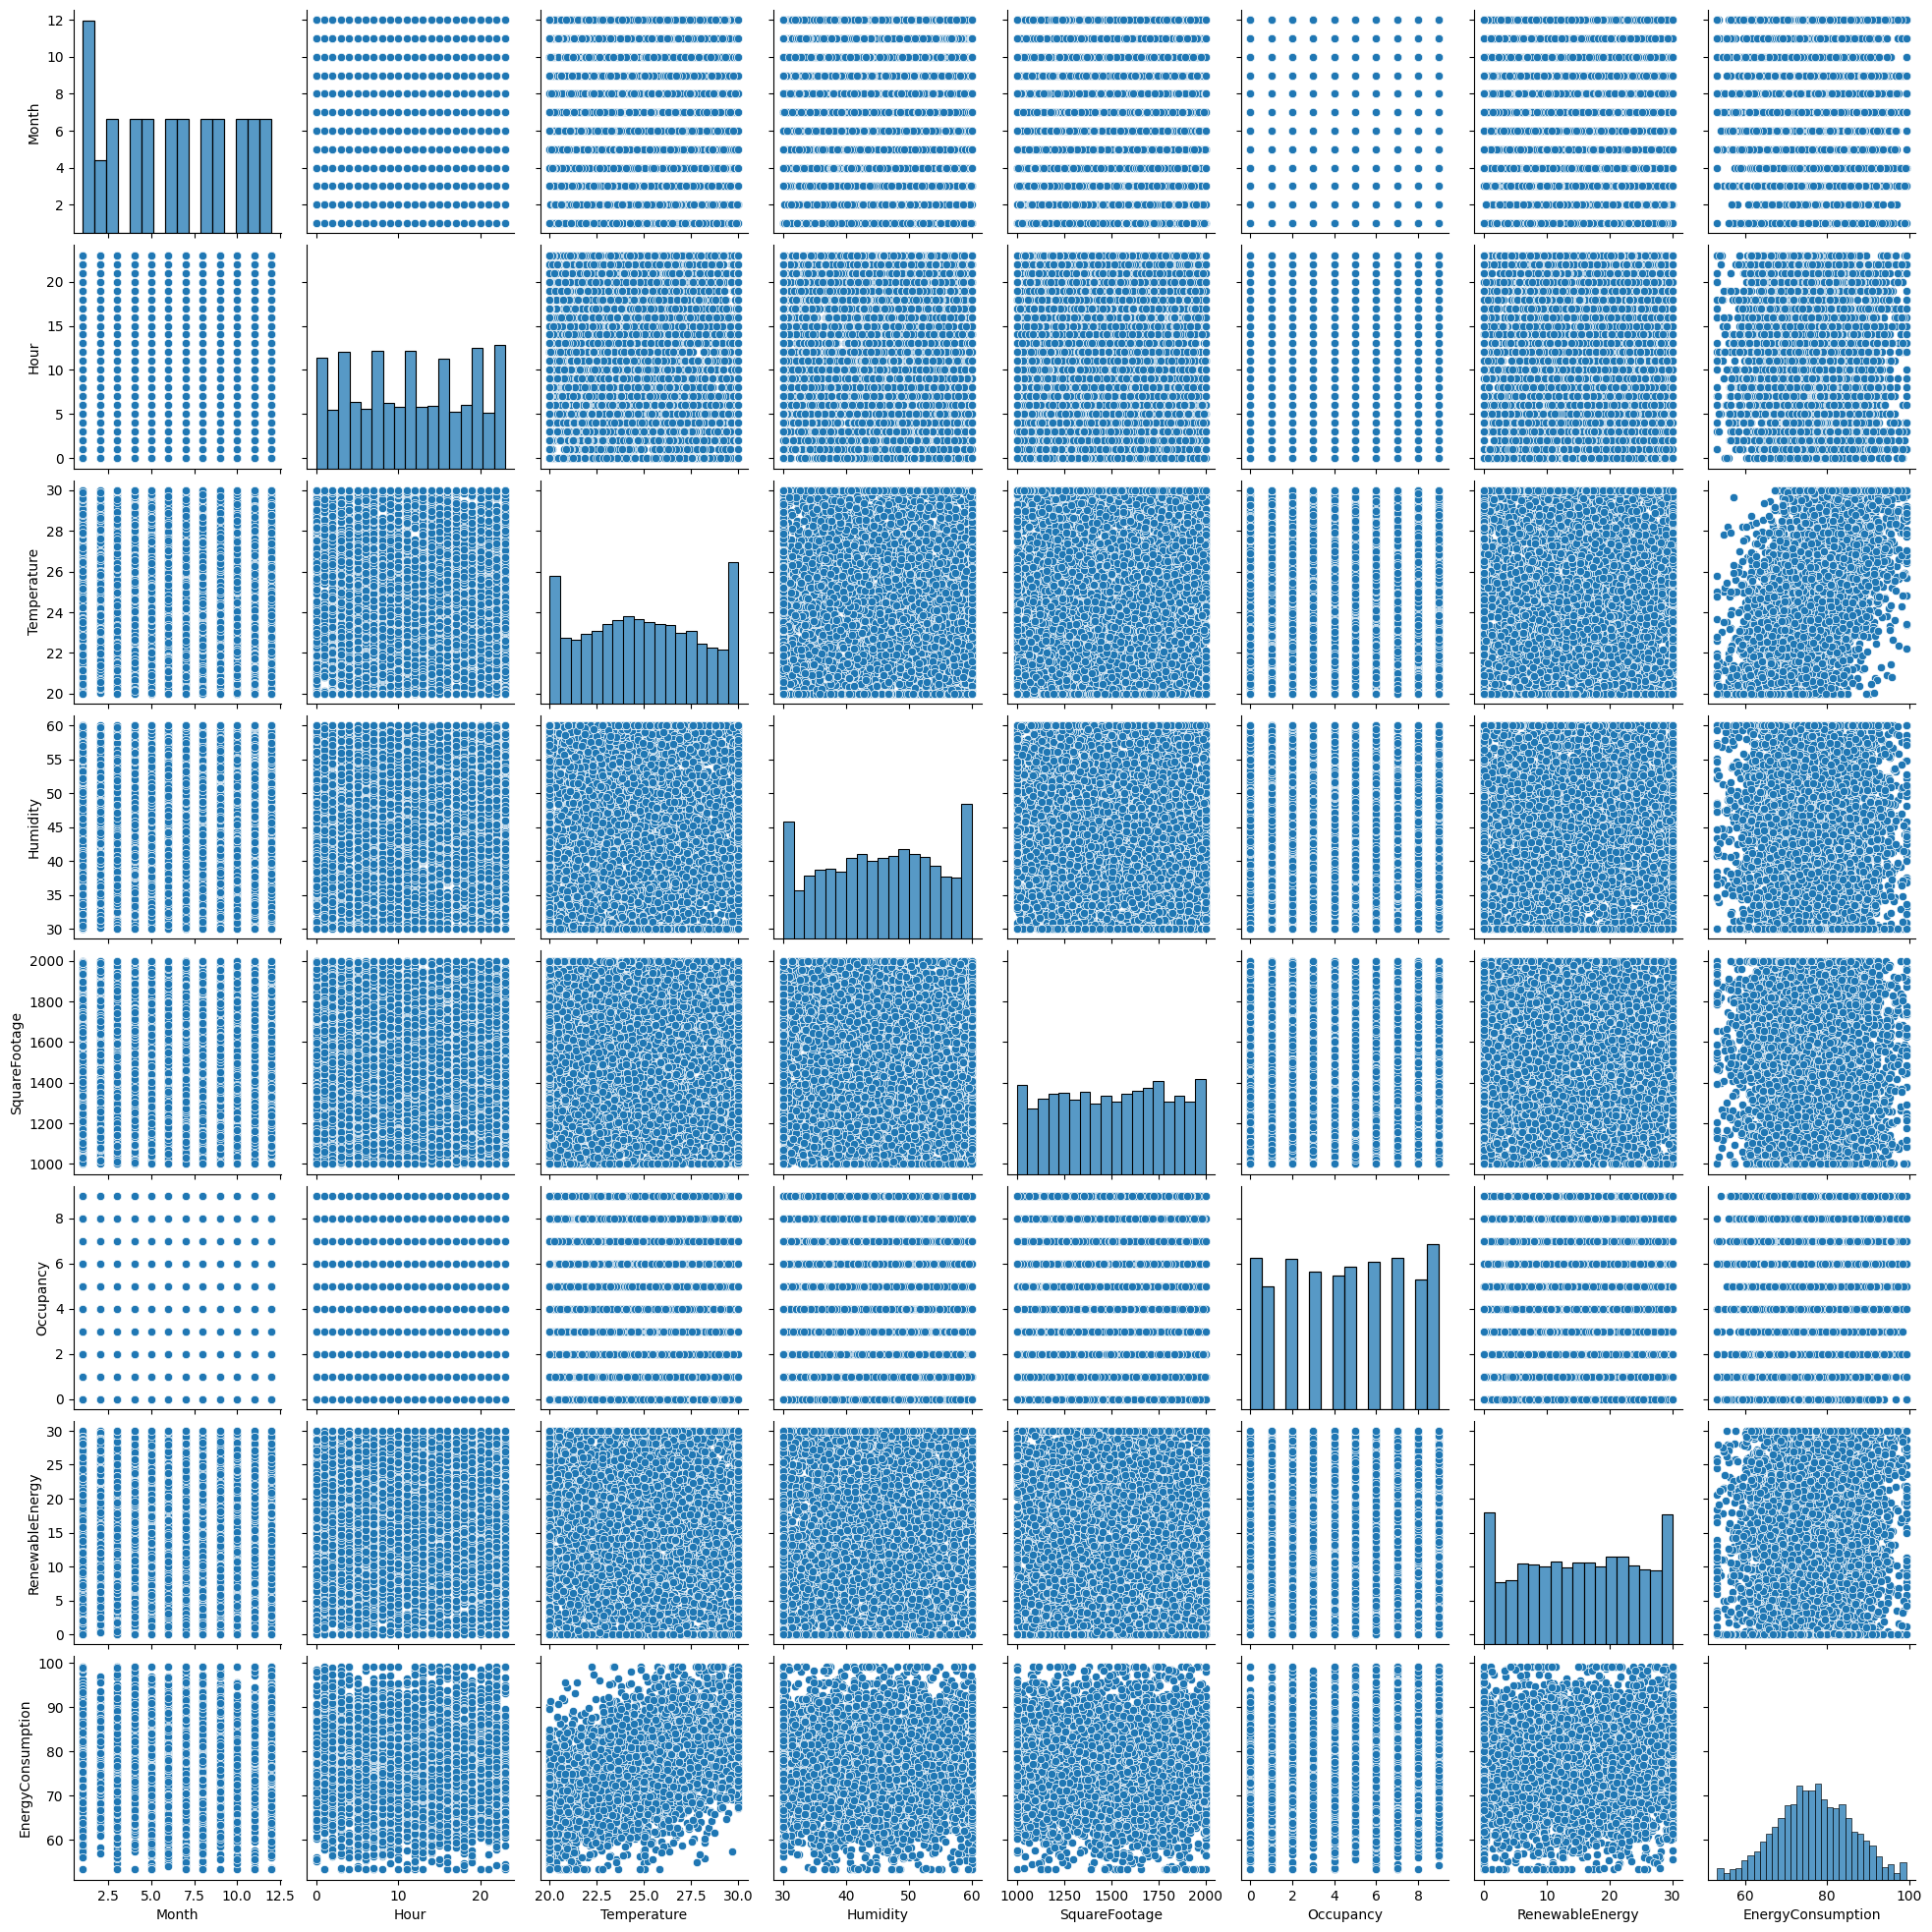

In [5]:
# Pair Plot to visualize relationships between variables
sns.pairplot(df.select_dtypes(include=[np.number]))

<Axes: >

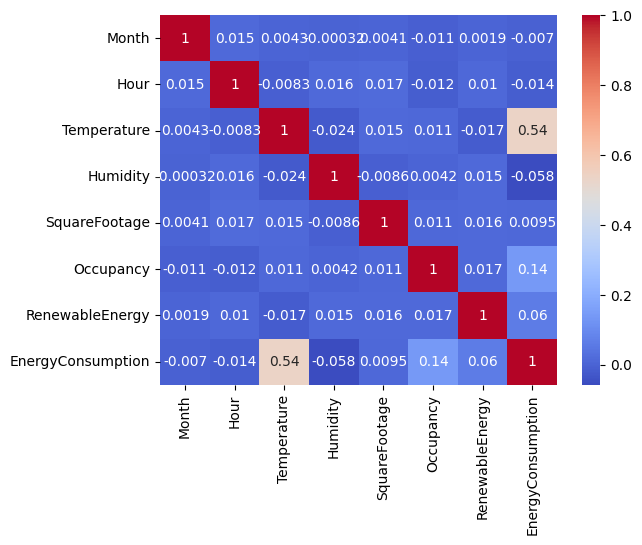

In [6]:
# Correlation Heatmap
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Feature Engineering

In [7]:
# Create a new feature: TotalUsage
df['TotalUsage'] = df['HVACUsage'].cat.codes + df['LightingUsage'].cat.codes

# Check the new feature
df[['HVACUsage', 'LightingUsage', 'TotalUsage']].head()

,HVACUsage,LightingUsage,TotalUsage
0,On,Off,1
1,On,On,2
2,Off,Off,0
3,Off,On,1
4,On,Off,1


# Model Building and Evaluation

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define features and target
X = df.drop('EnergyConsumption', axis=1)
y = df['EnergyConsumption']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

7.997264011113966

# Discussion and Future Work

In this notebook, we explored a dataset on energy consumption and developed a predictive model using a Random Forest Regressor. The model achieved a root mean squared error (RMSE) of the value computed above, indicating its performance on the test set. While this is a good starting point, there are several avenues for future work:

- **Feature Selection**: Further analysis could be done to identify the most significant features impacting energy consumption.
- **Model Tuning**: Hyperparameter tuning could improve model performance.
- **Time Series Analysis**: Given the temporal nature of the data, time series models could be explored.

If you found this notebook insightful, please consider upvoting it.